In [ ]:
#@title TensorFlow
# Copyright 2021 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

# Lab 1: Intro to TensorFlow

In this lab, you'll get exposure to using TensorFlow and learn how it can be used for solving deep learning tasks. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.


# Part 1: Intro to TensorFlow

## 0.1 Install TensorFlow

TensorFlow is a software library extensively used in machine learning. Here we'll learn how computations are represented and how to define a simple neural network in TensorFlow. For all the labs in 6.S191 2021, we'll be using the latest version of TensorFlow, TensorFlow 2, which affords great flexibility and the ability to imperatively execute operations, just like in Python. You'll notice that TensorFlow 2 is quite similar to Python in its syntax and imperative execution. Let's install TensorFlow and a couple of dependencies.


In [3]:

import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115446 sha256=cd4e09684325523ccef2801e38e45fa88794fdb2232ac51df43f22298757fee2
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\9a\b9\4f\99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656453 sha256=bc98b6aa5619a92659b14a212802221b9f945b66dd00dd2dae33e5fe6b451938
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\99\f7\e3\d6f0f120ac047c1e5de2ae34930e7bf6e8de1c7a4d5fa68555
Successfully built mitdeeplearning gym


## 1.1 Why is TensorFlow called TensorFlow?

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The ```shape``` of a Tensor defines its number of dimensions and the size of each dimension. The ```rank``` of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

Let's first look at 0-d Tensors, of which a scalar is an example:

In [4]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


Vectors and lists can be used to create 1-d Tensors:

In [5]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


Next we consider creating 2-d (i.e., matrices) and higher-rank Tensors. For examples, in future labs involving image processing and computer vision, we will use 4-d Tensors. Here the dimensions correspond to the number of example images in our batch, image height, image width, and the number of color channels.

In [6]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[3.141592, 1.414213, 2.71821],[3.141592, 1.414213, 2.71821]], tf.float64)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2
print("`matrix` is a {}-d Tensor with shape: {}".format(tf.rank(matrix).numpy(), tf.shape(matrix)))

`matrix` is a 2-d Tensor with shape: [2 3]


In [7]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros(shape=(10,256,256,3))

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

As you have seen, the ```shape``` of a Tensor provides the number of elements in each Tensor dimension. The ```shape``` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank Tensor:

In [9]:
type(matrix)

tensorflow.python.framework.ops.EagerTensor

In [10]:
row_vector = matrix[0]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [3.141592 1.414213 2.71821 ]
`column_vector`: [2.71821 2.71821]
`scalar`: 2.71821


## 1.2 Computations on Tensors

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/add-graph.png)

In [12]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how  the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [13]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = a+b
  d = b-1
  e = c*d
  return e

Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [14]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

6.0


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

## 1.3 Neural networks in TensorFlow
We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called [Keras](https://www.tensorflow.org/guide/keras) that provides a powerful, intuitive framework for building and training deep learning models.

Let's first consider the example of a simple perceptron defined by just one dense layer: $ y = \sigma(Wx + b)$, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output. We can also visualize this operation using a graph: 

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph-2.png)

Tensors can flow through abstract types called [```Layers```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) -- the building blocks of neural networks. ```Layers``` implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity. We will first define a ```Layer``` to implement the simple perceptron defined above.

In [17]:
### Defining a network Layer ###

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):  #      a=[1,2,3,4,5]  -->  a[-1]==5
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.add(tf.matmul(x,self.W),self.b)

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.2697859  0.45750418 0.66536945]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of ```Layers``` that are commonly used in neural networks, for example a [```Dense```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable). Now, instead of using a single ```Layer``` to define our simple neural network, we'll use the  [`Sequential`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) model from Keras and a single [`Dense` ](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) layer to define our network. With the `Sequential` API, you can readily create neural networks by stacking together layers like building blocks. 

In [20]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)


That's it! We've defined our model using the Sequential API. Now, we can test it out using an example input:

In [21]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model.predict(x_input)
print(model_output)

[[0.5607363 0.6566898 0.1249697]]


Now that we have learned how to define `Layers` as well as neural networks in TensorFlow using the `Sequential` APIs, we're ready to turn our attention to actually implement neural networks.

## Labwork
Implement the Neural Network created in lab# 1 using TensorFlow library

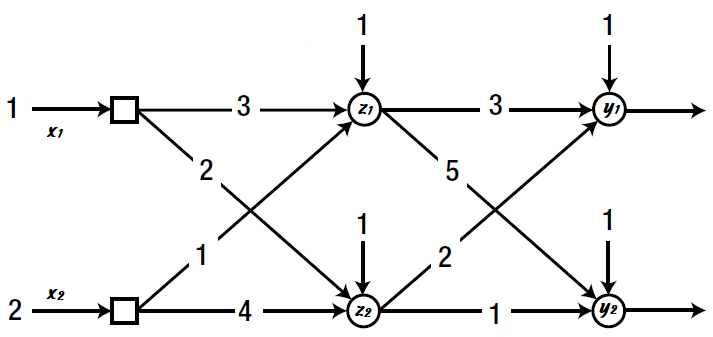

In [24]:
model=Sequential()
model.add(Dense(2, activation='relu', input_shape=(2,1)))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='sigmoid'))